# ResizeBox

`ResizeBox` is a Box which is resizeable and reports its *client size* to the `size` trait. 

A resize box is useful for wrapping a widget which is not dynamically resizable, for example: the [Matplotlib ipympl widget](https://github.com/matplotlib/ipympl).

All views of the resize box are resizeable and synchronise to be the same size.

Tip: Only use a `ResizeBox` if enabling the resize style ([resize css example](css_stylesheet.ipynb#Resize-example))) doesn't work, or if you want all views to be the same size.

In [1]:
import ipywidgets as ipw

import ipylab.widgets

In [2]:
button = ipw.Button()
label = ipw.HTML("Test")
resize_box = ipylab.widgets.ResizeBox([label], layout={"border": "solid 1px black"})


def observe(_):
    label.value = f"<b>Size: {resize_box.size}px</b>"


resize_box.observe(observe, names=("size"))

In [3]:
resize_box

ResizeBox(children=(HTML(value='Test'),), layout=Layout(border_bottom='solid 1px black', border_left='solid 1p…

In [4]:
resize_box

ResizeBox(children=(HTML(value='Test'),), layout=Layout(border_bottom='solid 1px black', border_left='solid 1p…

In [5]:
ipw.VBox([resize_box, resize_box])

## Matplotlib example

`ipympl` provides a resizeable figure, but it isn't dynamically resizeable.

**Restart jupyterlab if you installed ipympl**

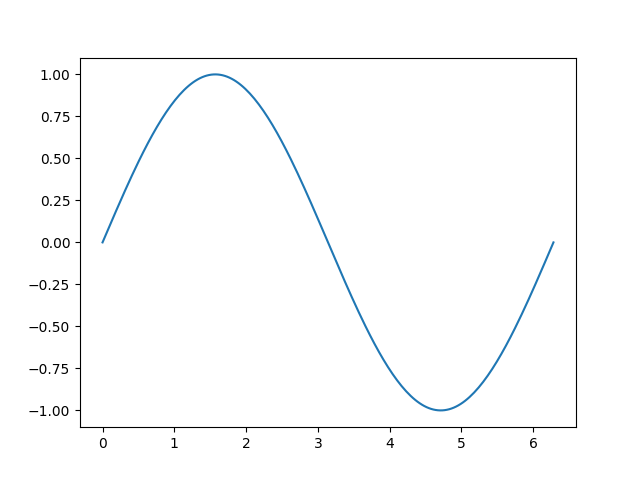

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.use("module://ipympl.backend_nbagg")  # ipympl

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

### Make the plot resize dynamically

We can dynamically update the size of the plot by using `ResizeBox`.

In [7]:
import ipylab
from ipylab.widgets import ResizeBox

app = ipylab.App()

box = ResizeBox([fig.canvas])
fig.canvas.resizable = False  # type: ignore


def _observe_resizebox_dimensions(change):
    box: ResizeBox = change["owner"]  # type: ignore
    canvas = box.children[0]  # type: ignore
    width, height = box.size
    dpi = canvas.figure.dpi  # type: ignore
    fig.set_size_inches(max((width) // dpi, 1), max((height) // dpi, 1))
    fig.canvas.draw_idle()


box.observe(_observe_resizebox_dimensions, names=("size"))

Lets add the box to the shell.

Try the following:
- Resize the browser and watch the figure update.
- Use the resize handle to resize the plot.

In [8]:
sc = await ipylab.App().shell.add(box)

In [9]:
sc.close()